In [1]:
#HBN

In [2]:
import glob
import nibabel as nib
import numpy as np
import os
import cupy as cp
import pandas as pd
import re
import time
import seaborn as sns

In [3]:
fast_mask = '/home/orco/data/kinderseg/HBN_MRI/derivatives/fastsurfer/{}/mri/aparc.DKTatlas+aseg.deep.mgz'

In [4]:
frees_mask = '/home/orco/data/kinderseg/HBN_MRI/derivatives/freesurfer/{}.reconall/mri/aparc.DKTatlas+aseg.mgz'

In [5]:
!cat /usr/local/freesurfer/FreeSurferColorLUT.txt


#No. Label Name:                            R   G   B   A

0   Unknown                                 0   0   0   0
1   Left-Cerebral-Exterior                  70  130 180 0
2   Left-Cerebral-White-Matter              245 245 245 0
3   Left-Cerebral-Cortex                    205 62  78  0
4   Left-Lateral-Ventricle                  120 18  134 0
5   Left-Inf-Lat-Vent                       196 58  250 0
6   Left-Cerebellum-Exterior                0   148 0   0
7   Left-Cerebellum-White-Matter            220 248 164 0
8   Left-Cerebellum-Cortex                  230 148 34  0
9   Left-Thalamus-unused                    0   118 14  0
10  Left-Thalamus                           0   118 14  0
11  Left-Caudate                            122 186 220 0
12  Left-Putamen                            236 13  176 0
13  Left-Pallidum                           12  48  255 0
14  3rd-Ventricle                           204 182 142 0
15  4th-Ventricle                           42  204 164 0
16  Brain-St

In [6]:
table = '/usr/local/freesurfer/FreeSurferColorLUT.txt'

In [7]:
with open(table, 'r') as t:
    l = t.readlines()
    l= [i for i in l if re.search(r'^[0-9]', i)] # take each line starting with a number
    name_map = pd.DataFrame([' '.join(i.split()).split() for i in l])[[0,1]].set_index(1).to_dict()[0]
    num_map = pd.DataFrame([' '.join(i.split()).split() for i in l])[[0,1]].set_index(0).to_dict()[1]

In [8]:
subids = [i for i in os.listdir('/home/orco/data/kinderseg/HBN_MRI/derivatives/fastsurfer') if i.startswith('sub-')]
#subids                                                                                                        

In [9]:
f = fast_mask.format(subids[0])
img = nib.load(f)
arr = img.get_fdata()
roinums = np.unique(arr)


In [10]:
roinames = [num_map[str(int(i))] for i in roinums]

In [11]:
from joblib import Parallel, delayed


In [12]:
def dice(f1, f2,n):
    arr1 = nib.load(f1).get_fdata()
    arr2 = nib.load(f2).get_fdata()
    arr1 = np.where(arr1==n,1,0)
    arr2 = np.where(arr2==n,1,0)
    return (arr1 & arr2).sum()*2/(arr1.sum() + arr2.sum())

In [13]:
start = time.time()
d = dict()
dlog = dict()
for i in subids:
    try:
        d[i] = Parallel(n_jobs=32)(delayed(dice)(fast_mask.format(i),frees_mask.format(i),n) for n in roinums)
        dlog[i] = True
    except:
        dlog[i] = False
stop = time.time()
print(stop-start)
#748.1604852676392s

669.2551248073578


In [14]:
# same with NORMDATA

In [15]:
#save
pd.DataFrame.from_dict(d).to_csv('DSCs.csv')

In [12]:
nfast_mask = '/home/orco/data/kinderseg/NORMDATA/derivatives/fastsurfer/{}/mri/aparc.DKTatlas+aseg.deep.mgz'
nfree_mask = '/home/orco/data/kinderseg/NORMDATA/derivatives/freesurfer/{}.reconall/mri/aparc.DKTatlas+aseg.mgz'

In [17]:
subids = [i for i in os.listdir('/home/orco/data/kinderseg/NORMDATA') if i.startswith('sub-')]

In [18]:
subids

['sub-N158',
 'sub-N030',
 'sub-N220',
 'sub-N049',
 'sub-N153',
 'sub-N130',
 'sub-N005',
 'sub-N116',
 'sub-N195',
 'sub-N197',
 'sub-N007',
 'sub-N117',
 'sub-N142',
 'sub-N194',
 'sub-N064',
 'sub-N201',
 'sub-N110',
 'sub-N091',
 'sub-N192',
 'sub-N169',
 'sub-N081',
 'sub-N002',
 'sub-N071',
 'sub-N214',
 'sub-N035',
 'sub-N042',
 'sub-N074',
 'sub-N177',
 'sub-N164',
 'sub-N055',
 'sub-N207',
 'sub-N058',
 'sub-N019',
 'sub-N209',
 'sub-N003',
 'sub-N210',
 'sub-N078',
 'sub-N198',
 'sub-N043',
 'sub-N156',
 'sub-N053',
 'sub-N202',
 'sub-N034',
 'sub-N106',
 'sub-N203',
 'sub-N011',
 'sub-N093',
 'sub-N108',
 'sub-N143',
 'sub-N125',
 'sub-N118',
 'sub-N080',
 'sub-N023',
 'sub-N090',
 'sub-N067',
 'sub-N016',
 'sub-N075',
 'sub-N229',
 'sub-N159',
 'sub-N135',
 'sub-N092',
 'sub-N224',
 'sub-N028',
 'sub-N121',
 'sub-N152',
 'sub-N088',
 'sub-N217',
 'sub-N190',
 'sub-N021',
 'sub-N183',
 'sub-N018',
 'sub-N062',
 'sub-N231',
 'sub-N206',
 'sub-N136',
 'sub-N017',
 'sub-N061',

In [19]:
start = time.time()
dn = dict()
dnlog = dict()
for i in subids:
    try:
        dn[i] = Parallel(n_jobs=25)(delayed(dice)(nfast_mask.format(i),nfree_mask.format(i),n) for n in roinums)
        dnlog[i] = True
    except:
        dnlog[i] = False
stop = time.time()
print(stop-start)
# 502.868745803833s

627.4999339580536


In [20]:
# Merge dictionaries

In [21]:

d.update(dn)

In [22]:
df = pd.DataFrame.from_dict(d)
df.head()

,sub-NDARCE721YB5,sub-NDARME930DE7,sub-NDARNH147WGN,sub-NDARFW292PBD,sub-NDARMT882AWE,sub-NDARJM708VGE,sub-NDAREG590BNY,sub-NDARPW482TVE,sub-NDARHM475DC5,sub-NDARRK882CLT,...,sub-N132,sub-N036,sub-N063,sub-N039,sub-N052,sub-N200,sub-N050,sub-N069,sub-N041,sub-N032
0,0.998163,0.998371,0.998754,0.998818,0.998844,0.998834,0.997734,0.999061,0.998495,0.998513,...,0.998657,0.997647,0.997105,0.997389,0.998069,0.998652,0.997023,0.998706,0.997394,0.997412
1,0.964504,0.957297,0.961970,0.965199,0.954194,0.971303,0.948538,0.971856,0.954198,0.958124,...,0.960767,0.956678,0.965435,0.947936,0.959112,0.969810,0.951998,0.968409,0.954782,0.965847
2,0.890504,0.953943,0.936941,0.920570,0.854341,0.974848,0.901757,0.932060,0.925882,0.840628,...,0.963633,0.948051,0.864649,0.948615,0.896130,0.946243,0.911277,0.921297,0.910934,0.919587
3,0.633517,0.829346,0.806154,0.802339,0.414634,0.854466,0.651466,0.870406,0.725240,0.827839,...,0.870748,0.780234,0.654991,0.857630,0.748387,0.869314,0.765049,0.769231,0.829757,0.824519
4,0.893572,0.872146,0.899230,0.918008,0.893663,0.892860,0.888395,0.888440,0.882828,0.901653,...,0.839841,0.915734,0.877841,0.841554,0.905136,0.915571,0.908465,0.884555,0.878464,0.909883


In [23]:
df['roi'] = roinames

In [24]:
df = df.set_index(df.roi)

In [25]:
df.to_csv('DSCs.csv')

In [26]:
df.columns

Index(['sub-NDARCE721YB5', 'sub-NDARME930DE7', 'sub-NDARNH147WGN',
       'sub-NDARFW292PBD', 'sub-NDARMT882AWE', 'sub-NDARJM708VGE',
       'sub-NDAREG590BNY', 'sub-NDARPW482TVE', 'sub-NDARHM475DC5',
       'sub-NDARRK882CLT',
       ...
       'sub-N036', 'sub-N063', 'sub-N039', 'sub-N052', 'sub-N200', 'sub-N050',
       'sub-N069', 'sub-N041', 'sub-N032', 'roi'],
      dtype='object', length=222)

In [27]:
len(df.columns)

222

In [28]:
df_melted = pd.melt(df.drop(columns=['roi']).transpose().drop(columns=['Unknown']))

In [29]:
df_melted.columns = ['ROI', 'DSC']

In [30]:
df_melted.head()

,ROI,DSC
0,Left-Cerebral-White-Matter,0.964504
1,Left-Cerebral-White-Matter,0.957297
2,Left-Cerebral-White-Matter,0.961970
3,Left-Cerebral-White-Matter,0.965199
4,Left-Cerebral-White-Matter,0.954194


In [31]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'figure.autolayout': True,
                    'axes.labelsize': 25,
                    'axes.titlesize':25,
                    'xtick.labelsize':16,
                     'ytick.labelsize': 20})

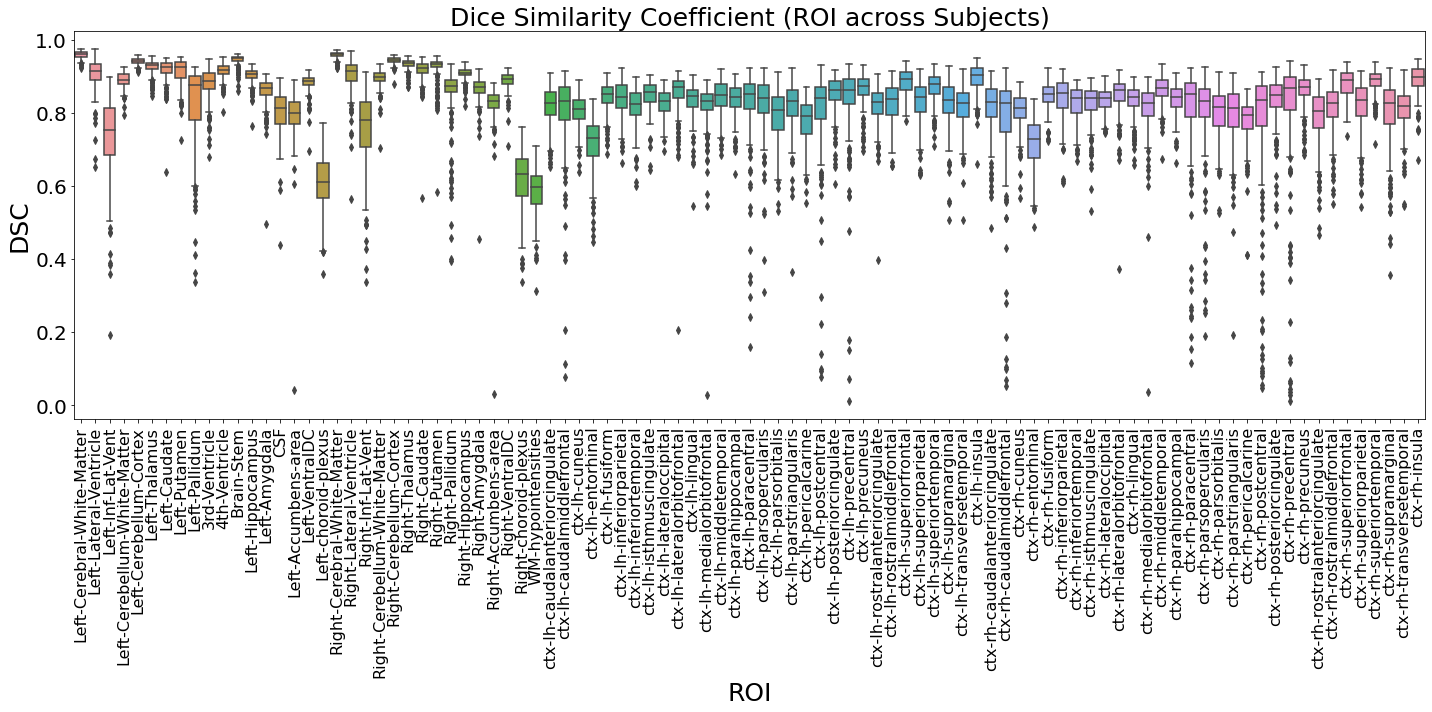

In [32]:
g = sns.boxplot(x='ROI', y='DSC', data=df_melted)
g.set_title('Dice Similarity Coefficient (ROI across Subjects)')
plt.setp(g.get_xticklabels(), rotation=90)
#plt.xlabel('ROI', fontsize=20)
#plt.ylabel('DSC', fontsize=20)
plt.tight_layout()
plt.savefig("DSCs.jpg", dpi=600)

In [33]:
df

,sub-NDARCE721YB5,sub-NDARME930DE7,sub-NDARNH147WGN,sub-NDARFW292PBD,sub-NDARMT882AWE,sub-NDARJM708VGE,sub-NDAREG590BNY,sub-NDARPW482TVE,sub-NDARHM475DC5,sub-NDARRK882CLT,...,sub-N036,sub-N063,sub-N039,sub-N052,sub-N200,sub-N050,sub-N069,sub-N041,sub-N032,roi
roi,,,,,,,,,,,,,,,,,,,,,
Unknown,0.998163,0.998371,0.998754,0.998818,0.998844,0.998834,0.997734,0.999061,0.998495,0.998513,...,0.997647,0.997105,0.997389,0.998069,0.998652,0.997023,0.998706,0.997394,0.997412,Unknown
Left-Cerebral-White-Matter,0.964504,0.957297,0.961970,0.965199,0.954194,0.971303,0.948538,0.971856,0.954198,0.958124,...,0.956678,0.965435,0.947936,0.959112,0.969810,0.951998,0.968409,0.954782,0.965847,Left-Cerebral-White-Matter
Left-Lateral-Ventricle,0.890504,0.953943,0.936941,0.920570,0.854341,0.974848,0.901757,0.932060,0.925882,0.840628,...,0.948051,0.864649,0.948615,0.896130,0.946243,0.911277,0.921297,0.910934,0.919587,Left-Lateral-Ventricle
Left-Inf-Lat-Vent,0.633517,0.829346,0.806154,0.802339,0.414634,0.854466,0.651466,0.870406,0.725240,0.827839,...,0.780234,0.654991,0.857630,0.748387,0.869314,0.765049,0.769231,0.829757,0.824519,Left-Inf-Lat-Vent
Left-Cerebellum-White-Matter,0.893572,0.872146,0.899230,0.918008,0.893663,0.892860,0.888395,0.888440,0.882828,0.901653,...,0.915734,0.877841,0.841554,0.905136,0.915571,0.908465,0.884555,0.878464,0.909883,Left-Cerebellum-White-Matter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ctx-rh-superiorparietal,0.823887,0.834485,0.879334,0.894633,0.848391,0.877061,0.742954,0.890830,0.868725,0.886799,...,0.754792,0.751208,0.774541,0.829510,0.878852,0.812208,0.853435,0.807936,0.821105,ctx-rh-superiorparietal
ctx-rh-superiortemporal,0.879756,0.887179,0.921342,0.915575,0.897079,0.916518,0.886868,0.889221,0.909661,0.913807,...,0.845904,0.889157,0.887001,0.903320,0.922751,0.869512,0.921572,0.905434,0.873374,ctx-rh-superiortemporal
ctx-rh-supramarginal,0.760865,0.814856,0.818584,0.831908,0.862895,0.814508,0.667445,0.898276,0.862882,0.868357,...,0.546000,0.777486,0.731277,0.807933,0.873896,0.741422,0.881615,0.777485,0.788205,ctx-rh-supramarginal


In [34]:
# Find outliers

In [35]:
subs = df.columns
#subs

In [36]:
df_out = df.drop(columns=['roi']).copy()

In [37]:
df_out = df_out.transpose() #.drop(columns=['Unknown'])
df_out = df_out.drop(columns=['Unknown'])
df_out

roi,Left-Cerebral-White-Matter,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,ctx-rh-precentral,ctx-rh-precuneus,ctx-rh-rostralanteriorcingulate,ctx-rh-rostralmiddlefrontal,ctx-rh-superiorfrontal,ctx-rh-superiorparietal,ctx-rh-superiortemporal,ctx-rh-supramarginal,ctx-rh-transversetemporal,ctx-rh-insula
sub-NDARCE721YB5,0.964504,0.890504,0.633517,0.893572,0.942353,0.927312,0.925222,0.946422,0.922898,0.883098,...,0.743494,0.852569,0.630319,0.734870,0.847996,0.823887,0.879756,0.760865,0.708122,0.886458
sub-NDARME930DE7,0.957297,0.953943,0.829346,0.872146,0.932746,0.941337,0.932698,0.948590,0.909039,0.871300,...,0.891117,0.877991,0.807186,0.830508,0.893806,0.834485,0.887179,0.814856,0.846422,0.918552
sub-NDARNH147WGN,0.961970,0.936941,0.806154,0.899230,0.952531,0.883196,0.935708,0.910459,0.830762,0.727763,...,0.896518,0.908246,0.851578,0.868547,0.904043,0.879334,0.921342,0.818584,0.811970,0.922555
sub-NDARFW292PBD,0.965199,0.920570,0.802339,0.918008,0.945465,0.941574,0.934672,0.940998,0.910250,0.900465,...,0.916215,0.914994,0.806127,0.850696,0.919058,0.894633,0.915575,0.831908,0.837461,0.941921
sub-NDARMT882AWE,0.954194,0.854341,0.414634,0.893663,0.941060,0.861908,0.845704,0.893409,0.784556,0.854779,...,0.867822,0.877268,0.737890,0.868606,0.918048,0.848391,0.897079,0.862895,0.802395,0.919336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-N200,0.969810,0.946243,0.869314,0.915571,0.956096,0.933114,0.936405,0.895727,0.747044,0.908252,...,0.894837,0.895572,0.839080,0.879930,0.916767,0.878852,0.922751,0.873896,0.859242,0.924138
sub-N050,0.951998,0.911277,0.765049,0.908465,0.947317,0.933200,0.905348,0.881562,0.832207,0.937688,...,0.763816,0.847958,0.817431,0.717212,0.833127,0.812208,0.869512,0.741422,0.826849,0.912551
sub-N069,0.968409,0.921297,0.769231,0.884555,0.945206,0.911143,0.921905,0.939387,0.913921,0.926978,...,0.912150,0.845316,0.852555,0.886014,0.923413,0.853435,0.921572,0.881615,0.827541,0.927204
sub-N041,0.954782,0.910934,0.829757,0.878464,0.942294,0.935568,0.943387,0.933035,0.898476,0.903509,...,0.867391,0.889264,0.779487,0.790442,0.857422,0.807936,0.905434,0.777485,0.794004,0.896335


In [38]:
rois = df_out.columns

In [39]:
rois

Index(['Left-Cerebral-White-Matter', 'Left-Lateral-Ventricle',
       'Left-Inf-Lat-Vent', 'Left-Cerebellum-White-Matter',
       'Left-Cerebellum-Cortex', 'Left-Thalamus', 'Left-Caudate',
       'Left-Putamen', 'Left-Pallidum', '3rd-Ventricle', '4th-Ventricle',
       'Brain-Stem', 'Left-Hippocampus', 'Left-Amygdala', 'CSF',
       'Left-Accumbens-area', 'Left-VentralDC', 'Left-choroid-plexus',
       'Right-Cerebral-White-Matter', 'Right-Lateral-Ventricle',
       'Right-Inf-Lat-Vent', 'Right-Cerebellum-White-Matter',
       'Right-Cerebellum-Cortex', 'Right-Thalamus', 'Right-Caudate',
       'Right-Putamen', 'Right-Pallidum', 'Right-Hippocampus',
       'Right-Amygdala', 'Right-Accumbens-area', 'Right-VentralDC',
       'Right-choroid-plexus', 'WM-hypointensities',
       'ctx-lh-caudalanteriorcingulate', 'ctx-lh-caudalmiddlefrontal',
       'ctx-lh-cuneus', 'ctx-lh-entorhinal', 'ctx-lh-fusiform',
       'ctx-lh-inferiorparietal', 'ctx-lh-inferiortemporal',
       'ctx-lh-isthmuscin

In [40]:
d = dict()
for roi in rois:
    dscs = df_out[roi].values
    median = np.median(dscs)
    std = np.std(dscs)
    d[roi] = (dscs < median - 2.698 * std) 

In [41]:
outliers = pd.DataFrame.from_dict(d)
outliers.head()

,Left-Cerebral-White-Matter,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,ctx-rh-precentral,ctx-rh-precuneus,ctx-rh-rostralanteriorcingulate,ctx-rh-rostralmiddlefrontal,ctx-rh-superiorfrontal,ctx-rh-superiorparietal,ctx-rh-superiortemporal,ctx-rh-supramarginal,ctx-rh-transversetemporal,ctx-rh-insula
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
outliers = outliers.set_index(subs[:-1])

In [43]:
outliers = outliers.transpose()

In [44]:
d = dict()
for sub in outliers.columns:
    d[sub] = outliers[sub].sum()

In [45]:
outliers.to_csv('DSC_outliers_detail.csv')

In [46]:
pd.DataFrame.from_dict(d, orient='index').to_csv('DSC_outliers.csv')

In [5]:
# Hausdorff

In [13]:
# mkdir -p /tmp/RAMdisk
# sudo mount -t tmpfs -o size=1G tmpfs /tmp/RAMdisk

In [14]:
from nipype.algorithms.metrics import Distance
import os

In [15]:
subids = [i for i in os.listdir('/home/orco/data/kinderseg/HBN_MRI/derivatives/fastsurfer') if i.startswith('sub-')]

In [16]:
fast_mask = '/home/orco/data/kinderseg/HBN_MRI/derivatives/fastsurfer/{}/mri/aparc.DKTatlas+aseg.deep.mgz'

In [65]:
free_mask = '/home/orco/data/kinderseg/HBN_MRI/derivatives/freesurfer/{}.reconall/mri/aparc.DKTatlas+aseg.mgz'

In [138]:
nfast_mask = '/home/orco/data/kinderseg/NORMDATA/derivatives/fastsurfer/{}/mri/aparc.DKTatlas+aseg.deep.mgz'

In [139]:
nfree_mask = '/home/orco/data/kinderseg/NORMDATA/derivatives/freesurfer/{}.reconall/mri/aparc.DKTatlas+aseg.mgz'

In [63]:
#roinums

In [191]:
def mgz2tmpnii(f, n, sub_id):
    # Save a nifti in RAMdisk containing the n roi of the file f
    import nibabel as nib
    fobj = nib.load(f)
    outname = os.path.basename(f).replace('.mgz', '.nii.gz')
    arr1 = fobj.get_fdata()
    arr1 = np.where(arr1==n,1,0)
    niiobj = nib.Nifti1Image(arr1, header = fobj.header, affine = fobj.affine)
    outpath = '/tmp/RAMdisk/{}_{}_{}'.format(sub_id, n,outname)
    nib.save(niiobj, outpath)
    return outpath

In [192]:
import numpy as np
import SimpleITK as sitk
import nibabel as nib

In [193]:
np.nan

nan

In [208]:
def hausdorff(sub_id):
    global roinums
    global fast_mask
    global free_mask
    distances = list()
    hausdorff = sitk.HausdorffDistanceImageFilter()
    hausdorff.SetGlobalDefaultCoordinateTolerance(0.01)
    for num in roinums:
        try:
            fast_test = fast_mask.format(sub_id)
            free_test = frees_mask.format(sub_id)
            fast_nii = mgz2tmpnii(fast_test, num, sub_id)
            free_nii = mgz2tmpnii(free_test, num, sub_id)
            fast = sitk.ReadImage(fast_nii,2)
            free = sitk.ReadImage(free_nii,2)
            #try:
            hausdorff.Execute(fast, free)
            distances.append(hausdorff.GetHausdorffDistance())
            #     # except:
            #     #     free = sitk.Resample(free, fast,
            #     #          sitk.Transform(), 
            #     #          sitk.sitkNearestNeighbor)
            #     #     hausdorff.Execute(fast, free)
            #     #     distances.append(hausdorff.GetHausdorffDistance())
        except:
            distances.append(np.nan)
    return distances

In [209]:
import time

In [212]:
start = time.time()
distances = Parallel(n_jobs=16)(delayed(hausdorff)(sub_id) for sub_id in subids)
stop = time.time()
print(stop-start)

1500.1293592453003


In [213]:
len(subids) == len(distances)

True

In [214]:
len(roinums) == len(distances[0])

True

In [215]:
np.isnan(np.array(distances)).sum()

7680

In [216]:
np.array(distances).shape

(187, 96)

In [217]:
187*96

17952

In [228]:
def hausdorff(sub_id):
    global roinums
    global nfast_mask
    global nfree_mask
    distances = list()
    hausdorff = sitk.HausdorffDistanceImageFilter()
    hausdorff.SetGlobalDefaultCoordinateTolerance(0.01)
    for num in roinums:
        try:
            fast_test = nfast_mask.format(sub_id)
            free_test = nfree_mask.format(sub_id)
            fast_nii = mgz2tmpnii(fast_test, num, sub_id)
            free_nii = mgz2tmpnii(free_test, num, sub_id)
            fast = sitk.ReadImage(fast_nii,2)
            free = sitk.ReadImage(free_nii,2)
            hausdorff.Execute(fast, free)
            distances.append(hausdorff.GetHausdorffDistance())
        except:
            distances.append(np.nan)
    return distances

In [229]:
nsubids = [i for i in os.listdir('/home/orco/data/kinderseg/NORMDATA/derivatives/fastsurfer') if i.startswith('sub-')]

In [230]:
start = time.time()
ndistances = Parallel(n_jobs=16)(delayed(hausdorff)(sub_id) for sub_id in nsubids)
stop = time.time()
print(stop-start)

1473.6371285915375


In [231]:
np.isnan(np.array(ndistances)).sum()

1248

In [232]:
np.array(ndistances).shape

(127, 96)

In [233]:
127*96

12192

In [234]:
d = dict()

In [236]:
for i in range(len(subids)):
    d[subids[i]] = distances[i]

In [237]:
for i in range(len(nsubids)):
    d[nsubids[i]] = ndistances[i]

In [238]:
len(d)

314

In [240]:
import pandas as pd

In [242]:
hdf = pd.DataFrame.from_dict(d)

In [244]:
hdf['ROI'] = roinames

In [260]:
hdf

,sub-NDARCE721YB5,sub-NDARME930DE7,sub-NDARRU499DP2,sub-NDARNH147WGN,sub-NDARFW292PBD,sub-NDARMT882AWE,sub-NDARVV473XTY,sub-NDARJM708VGE,sub-NDAREG590BNY,sub-NDARPW482TVE,...,sub-N036,sub-N063,sub-N039,sub-N052,sub-N200,sub-N050,sub-N069,sub-N041,sub-N032,ROI
0,10.295630,9.273618,NaN,10.344080,8.246211,12.083046,NaN,9.486833,12.083047,8.062258,...,12.165525,11.224972,10.049876,11.789826,10.049876,11.445523,10.723805,9.949874,12.569805,Unknown
1,12.206556,6.782330,NaN,7.071068,7.810250,7.000000,NaN,6.708204,11.575837,7.874008,...,11.747340,7.681146,110.059076,5.385164,7.141428,7.874008,6.782330,6.782331,6.708204,Left-Cerebral-White-Matter
2,4.000000,2.000000,NaN,19.824228,2.449490,4.690416,NaN,2.236068,3.000000,4.242641,...,3.464102,24.124676,2.236068,3.741657,3.000000,6.708205,5.830952,3.741657,3.741657,Left-Lateral-Ventricle
3,7.810249,4.898979,NaN,13.190906,2.236068,8.774964,NaN,8.306624,11.874344,2.449490,...,8.124038,8.124038,6.403125,8.774964,2.828427,16.309508,3.464102,10.770331,5.196153,Left-Inf-Lat-Vent
4,8.306624,5.916080,NaN,5.744563,5.196152,5.000000,NaN,4.690416,5.744563,3.741657,...,6.082763,7.141428,5.916080,4.358899,3.741657,7.483315,4.582576,5.196152,5.000000,Left-Cerebellum-White-Matter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,13.076697,12.688578,NaN,6.403124,4.472136,7.071068,NaN,7.810250,19.723085,77.627315,...,16.124515,10.246950,13.928390,9.380831,9.273618,68.264193,7.071068,10.000001,6.633250,ctx-rh-superiorparietal
92,26.627052,8.062258,NaN,5.916080,6.782330,6.324555,NaN,7.348469,9.848859,7.071068,...,8.544004,10.198039,27.730849,6.403124,8.366600,39.255573,3.741657,9.486834,5.744563,ctx-rh-superiortemporal
93,11.357817,12.369317,NaN,8.544004,10.049876,11.045361,NaN,18.384776,12.806250,7.280110,...,13.638182,9.055385,8.944272,6.324555,7.810250,9.949874,5.744563,7.280111,9.539392,ctx-rh-supramarginal
94,5.744563,4.123106,NaN,7.483315,4.242641,3.316625,NaN,2.236068,3.162278,3.000000,...,2.449490,3.605551,5.385165,2.449490,3.000000,3.605551,2.236068,5.099020,5.000000,ctx-rh-transversetemporal


In [258]:
hdf.to_csv('Hausdorff_Distances.csv')

In [252]:
hdf_melted = pd.melt(hdf.set_index('ROI').T)

In [254]:
hdf_melted.columns = ['ROI', 'Hausdorff_Distance']

In [256]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'figure.autolayout': True,
                    'axes.labelsize': 25,
                    'axes.titlesize':25,
                    'xtick.labelsize':16,
                     'ytick.labelsize': 20})

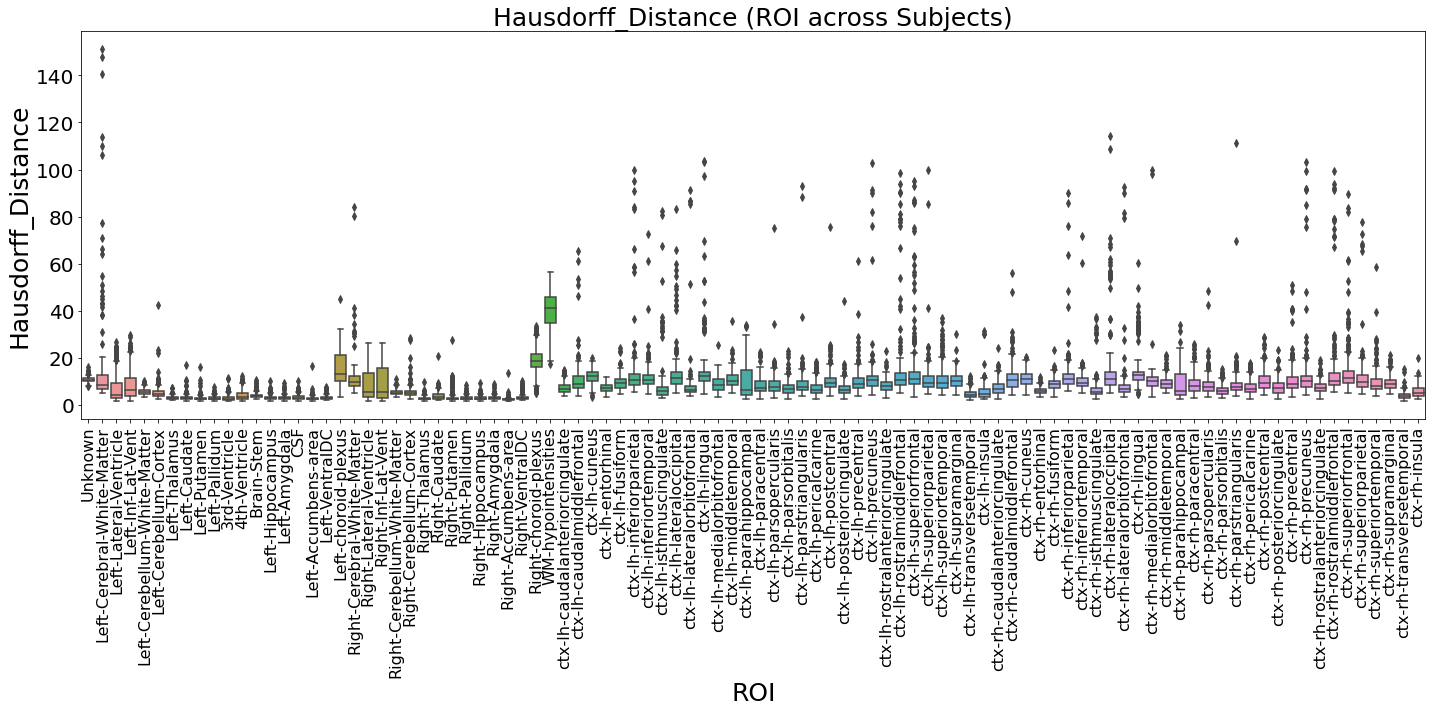

In [257]:
g = sns.boxplot(x='ROI', y='Hausdorff_Distance', data=hdf_melted)
g.set_title('Hausdorff_Distance (ROI across Subjects)')
plt.setp(g.get_xticklabels(), rotation=90)
#plt.xlabel('ROI', fontsize=20)
#plt.ylabel('DSC', fontsize=20)
plt.tight_layout()
plt.savefig("DSCs.jpg", dpi=600)

In [259]:
hfd

NameError: name 'hfd' is not defined